In [8]:
## importing

import sys
import numpy as np
sys.path.append('../signal_quality/')
import datasets
import importlib
import denoising
importlib.reload(denoising)

nstdb_path = '/zfsauton/project/public/chufang/nstdb/'
mitdb_path = '/zfsauton/project/public/chufang/mitdb/'

mitdb_dict = datasets.load_mitdb(data_path=mitdb_path, verbose=False, downsampled_sampling_rate=125)
nstdb_extra_dict = datasets.load_nstdb_extra(nstdb_path=nstdb_path, mitdb_path=mitdb_path, verbose=False, downsampled_sampling_rate=125)
train_x, train_y, train_noise_type, test_x, test_y, test_noise_type = denoising.load_data(mitdb_dict, nstdb_extra_dict, window=512)
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 48/48 [00:04<00:00, 10.16it/s]


(11760, 512) (11760, 512) (11760, 512) (11760, 512)


In [ ]:
import scipy

def plot_signal(example_signal, fs, title='Signal'):

    # fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18,6))

    plt.figure(figsize=(10,10))
    plt.subplot(2, 1, 1)
    plt.plot(np.arange(len(example_signal))/fs, example_signal)
    plt.title(title)

    f, t, Sxx = scipy.signal.spectrogram(example_signal, fs, scaling='density')
    plt.subplot(2, 2, 3)
    plt.pcolormesh(t, f, Sxx, shading='gouraud')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    # plt.ylim(0, 10)
    plt.title('Signal Spectrogram')

    f, Pxx_den = scipy.signal.periodogram(example_signal, fs)
    plt.subplot(2, 2, 4)
    plt.semilogy(f, Pxx_den)
    # plt.ylim([1e-7, 1e2])
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('PSD [V**2/Hz]')
    plt.title(title+' Periodogram')

    plt.tight_layout()
    plt.show()
        


In [16]:
## denoising with Discrte Wavelet Transform and Empirical Mode Decomposition
## For CNN Autoencoder denoising, see denoising.py
import multiprocessing

wavelet_preds = np.array([denoising.denoise_wavelet(x) for x in test_x])
# emd_preds = np.array([denoising.denoise_emd(x, sample_rate=125) for x in tqdm(test_x)])
with multiprocessing.Pool(processes=16) as pool:
    args = [(x, 125) for x in test_x]
    emd_preds = np.array(list(pool.starmap(denoising.denoise_emd, args)))

print(wavelet_preds.shape)
print(emd_preds.shape)

  0%|          | 0/11760 [00:00<?, ?it/s]

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/neurokit2/signal/signal_period.py:60: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfs

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/neurokit2/signal/signal_period.py:60: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfs

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/classes/signal_quality/dev/denoising.py:353: RuntimeWarning: Mean of empty slice
  flat_window = int(np.nanmean(np.array(waves_dwt['ECG_R_Offsets'])-np.array(waves_dwt['ECG_R_Onsets']))/

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/classes/signal_quality/dev/denoising.py:353: RuntimeWarning: Mean of empty slice
  flat_window = int(np.nanmean(np.array(waves_dwt['ECG_R_Offsets'])-np.array(waves_dwt['ECG_R_Onsets']))/2)+1
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret 

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/classes/signal_quality/dev/denoising.py:353: RuntimeWarning: Mean of empty slice
  flat_window = int(np.nanmean(np.array(waves_dwt['ECG_R_Offsets'])-np.array(waves_dwt['ECG_R_Onsets']))/2)+1
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dt

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/neurokit2/signal/signal_period.py:60: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfs

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/classes/signal_quality/dev/denoising.py:353: RuntimeWarning: Mean of empty slice
  flat_window = int(np.nanmean(np.array(waves_dwt['ECG_R_Offsets'])-np.array(waves_dwt['ECG_R_Onsets']))/2)+1
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rco

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/classes/signal_quality/dev/denoising.py:353: RuntimeWarning: Mean of empty slice
  flat_window = int(np.nanmean(np.array(waves_dwt['ECG_R_Offsets'])-np.array(waves_dwt['ECG_R_Onsets']))/2)+1
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dt

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/classes/signal_quality/dev/denoising.py:353: RuntimeWarning: Mean of empty slice
  flat_window = int(np.nanmean(np.array(waves_dwt['ECG_R_Offsets'])-np.array(waves_dwt['ECG_R_Onsets']))/2)+1
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dt

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/neurokit2/signal/signal_period.py:60: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/zfs

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2

/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/zfsauton2/home/chufang/miniconda3/envs/miladi/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/zfsauton2

(11760, 512)
(11760, 512)


In [17]:
## printing results for MSE

import matplotlib.pyplot as plt

lstm_preds = np.load('denoising_models/lstm_preds.npy')
cnn_preds = np.load('denoising_models/cnn_preds.npy')
cnnae_preds = np.load('denoising_models/cnnae_preds.npy')

print('Noise Type, dB, Wavelet MSE, EMD MSE, LSTM MSE, CNN MSE, AE MSE')
for noise_type in ['em', 'ma', 'bw', 'gn', 'all']:
    for dB in ['_6','00','06','12','18','24']:
        mask = test_noise_type == (noise_type+dB)
        
        print(noise_type, ',', dB.replace('_','-'),  ',',
            np.mean(np.mean(np.power(wavelet_preds[mask]-test_y[mask], 2), axis=1)), ',',
            np.mean(np.mean(np.power(emd_preds[mask]-test_y[mask], 2), axis=1)), ',', 
            np.mean(np.mean(np.power(lstm_preds[mask]-test_y[mask], 2), axis=1)), ',', 
            np.mean(np.mean(np.power(cnn_preds[mask]-test_y[mask], 2), axis=1)), ',', 
            np.mean(np.mean(np.power(cnnae_preds[mask]-test_y[mask], 2), axis=1)))

Noise Type, dB, Wavelet MSE, EMD MSE, LSTM MSE, CNN MSE, AE MSE
em , -6 , 0.08237737086666493 , 0.06835560288317231 , 0.03557124915129771 , 0.023545672349275484 , 0.018586318353813632
em , 00 , 0.05271559742935125 , 0.048317476342511934 , 0.023636684951709938 , 0.01519365477305934 , 0.010403778907714588
em , 06 , 0.02759296122659074 , 0.033687171732551424 , 0.012188447995387172 , 0.009452721001526861 , 0.006769877941568011
em , 12 , 0.010055283997656901 , 0.021313209910750638 , 0.005938768764398084 , 0.00654062910734516 , 0.005466037466607488
em , 18 , 0.002800585307636437 , 0.01711625614878873 , 0.0035686817567168677 , 0.004743857748962494 , 0.0047785497563177775
em , 24 , 0.0008331315747396247 , 0.017710601781669253 , 0.0030444265131186195 , 0.003795209206921607 , 0.004689745080791718
ma , -6 , 0.08385966010239945 , 0.08526197819831868 , 0.025544798961441847 , 0.021683100963813432 , 0.010814538181446783
ma , 00 , 0.0611970981724324 , 0.06805320690097921 , 0.01635110790461237 , 0.0149

In [20]:
## printing results for SNR

print('Noise Type, dB, Wavelet SNR, EMD SNR, LSTM SNR, CNN SNR, AE SNR')
for noise_type in ['em', 'ma', 'bw', 'gn', 'all']:
    for dB in ['_6','00','06','12','18','24']:
        mask = test_noise_type == (noise_type+dB)
        
        print(noise_type, ',', dB.replace('_','-'),  ',',
            np.mean([denoising.calc_snr(wavelet_preds[mask][i], test_y[mask][i]) for i in range(len(test_y[mask]))]), ',',
            np.mean([denoising.calc_snr(emd_preds[mask][i], test_y[mask][i]) for i in range(len(test_y[mask]))]), ',',
            np.mean([denoising.calc_snr(lstm_preds[mask][i], test_y[mask][i]) for i in range(len(test_y[mask]))]), ',',
            np.mean([denoising.calc_snr(cnn_preds[mask][i], test_y[mask][i]) for i in range(len(test_y[mask]))]), ',',
            np.mean([denoising.calc_snr(cnnae_preds[mask][i], test_y[mask][i]) for i in range(len(test_y[mask]))]), ',',)

Noise Type, dB, Wavelet SNR, EMD SNR, LSTM SNR, CNN SNR, AE SNR
em , -6 , 3.348791698428695 , 1.6168643165642769 , -0.17003203185051913 , -0.40219720789179136 , -0.36769168825596804 ,
em , 00 , 2.532812200318603 , 0.8348789339172231 , -0.25970629847594295 , -0.5006922412143398 , -0.250860689414371 ,
em , 06 , 2.0004802852366357 , 0.2656309120165477 , 0.03398773057305466 , -0.4596982587824998 , -0.13183013321000334 ,
em , 12 , 1.2295615926094314 , -0.44690972312583266 , 0.29283057410075114 , -0.4719859235608783 , -0.08934598296087247 ,
em , 18 , 0.4950084183705107 , -1.2064424556343791 , 0.2415908999120983 , -0.49107855940166406 , -0.10250900733042365 ,
em , 24 , 0.19947939518022237 , -1.7163943013282668 , 0.20526330277813093 , -0.2502850727627191 , 0.08295373692989719 ,
ma , -6 , -7.543437888123948 , -8.924148050208352 , -2.6498196406491883 , -1.058808459783667 , -0.5000296960539683 ,
ma , 00 , -6.01436236392658 , -7.8035895167300176 , -1.889934046704522 , -0.6863806225067217 , -0.2443

In [21]:
## printing results for ECGSNR

print('Noise Type, dB, Wavelet ECGSNR, EMD ECGSNR, LSTM ECGSNR, CNN ECGSNR, AE ECGSNR')
for noise_type in ['em', 'ma', 'bw', 'gn', 'all']:
    for dB in ['_6','00','06','12','18','24']:
        mask = test_noise_type == (noise_type+dB)
        
        print(noise_type, ',', dB.replace('_','-'),  ',',
            np.mean([denoising.calc_snr_ecg(wavelet_preds[mask][i], test_y[mask][i], sampling_rate=125) for i in range(len(test_y[mask]))]), ',',
            np.mean([denoising.calc_snr_ecg(emd_preds[mask][i], test_y[mask][i], sampling_rate=125) for i in range(len(test_y[mask]))]), ',',
            np.mean([denoising.calc_snr_ecg(lstm_preds[mask][i], test_y[mask][i], sampling_rate=125) for i in range(len(test_y[mask]))]), ',',
            np.mean([denoising.calc_snr_ecg(cnn_preds[mask][i], test_y[mask][i], sampling_rate=125) for i in range(len(test_y[mask]))]), ',',
            np.mean([denoising.calc_snr_ecg(cnnae_preds[mask][i], test_y[mask][i], sampling_rate=125) for i in range(len(test_y[mask]))]), ',',)

Noise Type, dB, Wavelet ECGSNR, EMD ECGSNR, LSTM ECGSNR, CNN ECGSNR, AE ECGSNR
em , -6 , 72.75730637149972 , 72.61333038359543 , 72.62750156305978 , 72.56085889205382 , 72.89621071734399 ,
em , 00 , 72.76172234491303 , 72.68901216042201 , 72.6611285393236 , 72.75823398928564 , 73.01119501116519 ,
em , 06 , 72.73093791683289 , 72.65035152030245 , 72.80356709437439 , 72.85174334973257 , 73.00323033219279 ,
em , 12 , 72.88358424663015 , 72.83212668493472 , 72.90158139795699 , 72.87956642693541 , 73.00102524582876 ,
em , 18 , 72.96562713201276 , 72.94787106933533 , 72.97443815903219 , 72.93660610896012 , 73.03433223914037 ,
em , 24 , 73.00537503383498 , 73.0143812500018 , 73.0185809631635 , 72.97888742155226 , 73.05388425299171 ,
ma , -6 , 72.72388748937995 , 72.557293089795 , 72.31242247372236 , 72.57992458814522 , 72.94880677825299 ,
ma , 00 , 72.83690564548986 , 72.64900235027612 , 72.70288769563393 , 72.8285417400223 , 73.03356777610678 ,
ma , 06 , 72.96499069313282 , 72.88223321849547

# Visualizations Below

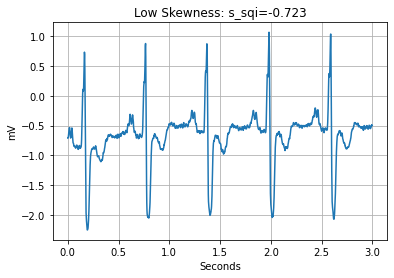

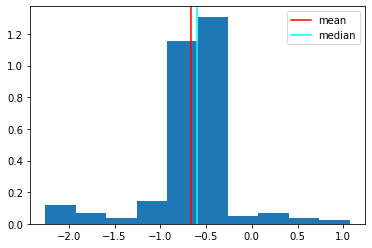

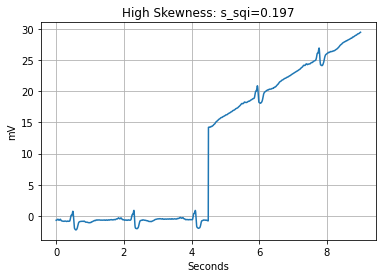

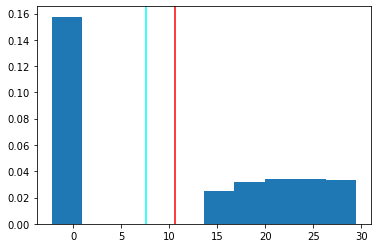

In [3]:
### Example of skewness in ECG signal

import wfdb
import matplotlib.pyplot as plt
import sys
import scipy.stats

mitdb_path = '/zfsauton/project/public/chufang/mitdb/'

subject = '118'
subject_record = wfdb.rdrecord(mitdb_path+subject)
subject_data = subject_record.p_signal.transpose()

start = 51000
step = 500*3

plt.xlabel('Seconds'); plt.ylabel('mV')
plt.grid()
plt.plot(np.arange(step)/500, subject_data[0,start:start+step])
plt.title('Low Skewness: s_sqi={:.3f}'.format(scipy.stats.skew(subject_data[0,start:start+step])))
plt.show()

plt.hist(subject_data[0,start:start+step], density=True)
plt.axvline(x=np.mean(subject_data[0,start:start+step]), label='mean', c='red')
plt.axvline(x=np.median(subject_data[0,start:start+step]), label='median', c='cyan')
plt.legend(); plt.show()

noise_data = np.arange(step)/500*10
noise_data[:step//2] = 0
plt.xlabel('Seconds'); plt.ylabel('mV')
plt.grid()
plt.plot(np.arange(step)/500*3, subject_data[0,start:start+step]+noise_data)
plt.title('High Skewness: s_sqi={:.3f}'.format(scipy.stats.skew(subject_data[0,start:start+step]+noise_data)))
plt.show()

plt.hist(subject_data[0,start:start+step]+noise_data, density=True)
plt.axvline(x=np.mean(subject_data[0,start:start+step]+noise_data), label='mean', c='red')
plt.axvline(x=np.median(subject_data[0,start:start+step]+noise_data), label='median', c='cyan')

plt.show()


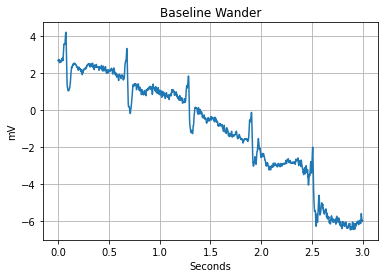

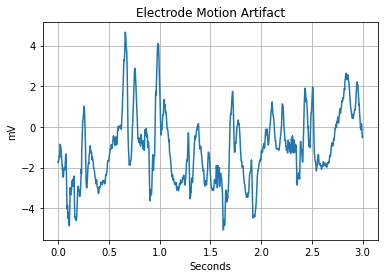

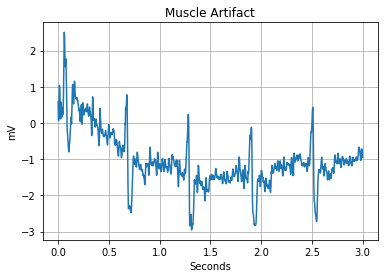

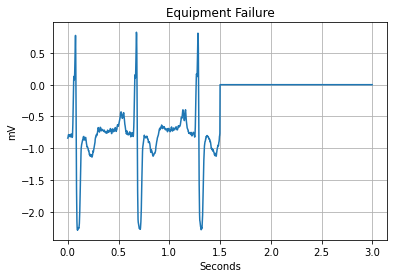

In [2]:
### Examples of types of noise Baseline Wander', 'Electrode Motion Artifact', 'Muscle Artifact

import wfdb
import matplotlib.pyplot as plt

subject = '118'
subject_record = wfdb.rdrecord(mitdb_path+subject)
subject_data = subject_record.p_signal.transpose()

start = 55000
step = 500*3

for noise_type, title in  zip(['bw', 'em', 'ma'],['Baseline Wander', 'Electrode Motion Artifact', 'Muscle Artifact']):

    noise_record = wfdb.rdrecord(nstdb_path+noise_type)
    noise_data = noise_record.p_signal.transpose()
    
    plt.title(title)
    plt.xlabel('Seconds'); plt.ylabel('mV')
    plt.grid()    
    plt.plot(np.arange(step)/500,
             subject_data[0,start:start+step]+noise_data[0,start:start+step]*5)
    plt.show()


noise_data = -subject_data[0,start:start+step]
noise_data[:step//2] = 0
plt.title('Equipment Failure')
plt.xlabel('Seconds'); plt.ylabel('mV')
plt.grid()
plt.plot(np.arange(step)/500,
         subject_data[0,start:start+step]+noise_data)
plt.show()

(225694,)


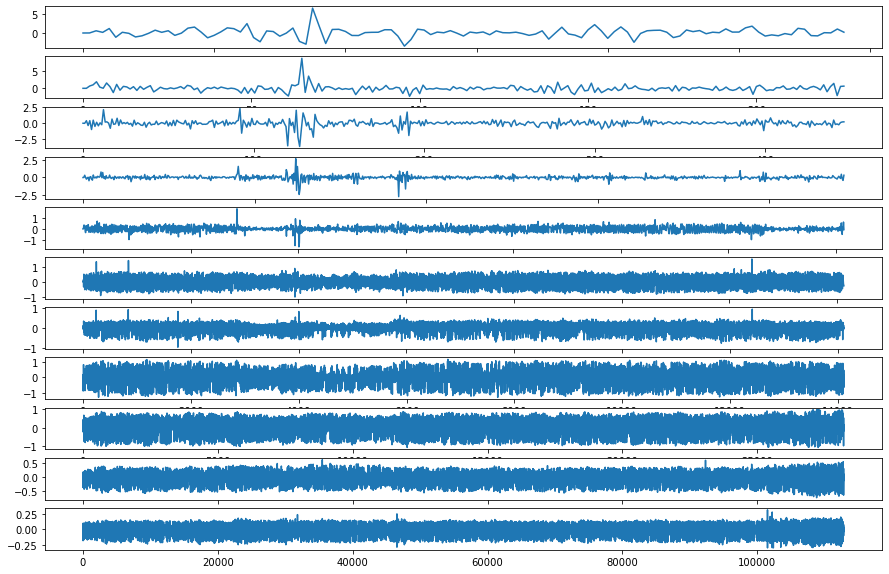

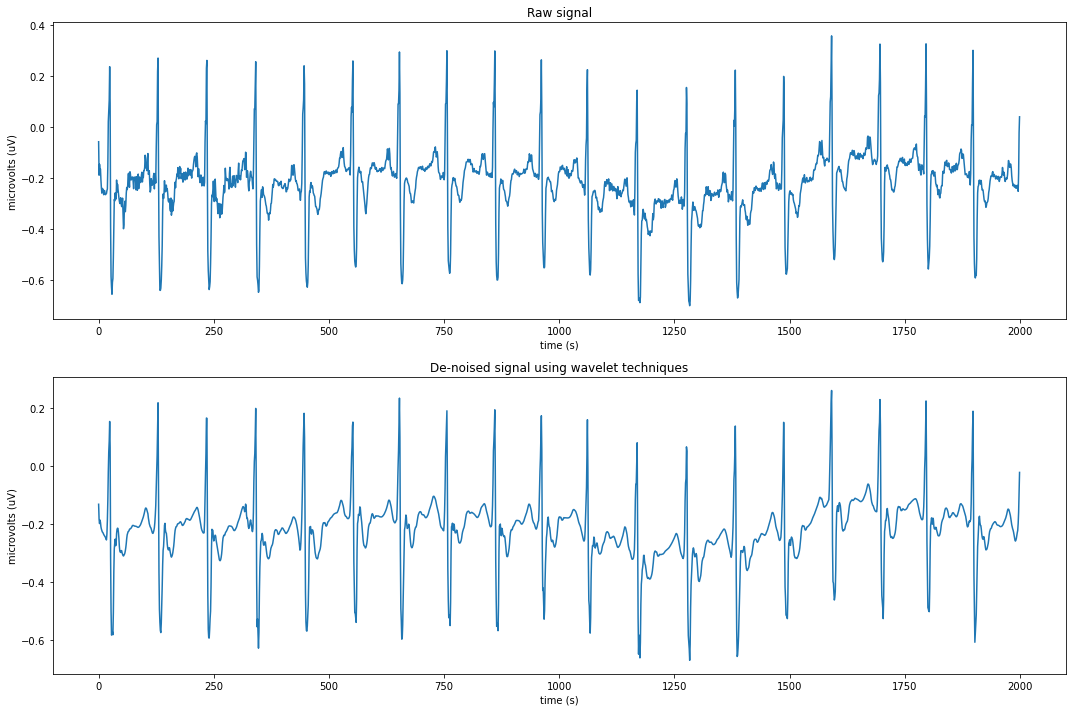

In [4]:
## Visualizing Wavelet Denoising
## Source: https://github.com/MProx/Wavelet-denoising

import matplotlib.pyplot as plt
importlib.reload(denoising)
import sys
import scipy

# output_dict
example_signal = mitdb_dict['118']['MLII']['data']
print(example_signal.shape)
index = np.arange(len(example_signal))

mintime = 0
maxtime = mintime + 1000

example_signal = denoising.rescale_signal(example_signal)
datarec = denoising.denoise_wavelet(example_signal, visualize=True)

mintime = 0
maxtime = mintime + 2000
plt.figure(figsize=(15,10))
plt.subplot(2, 1, 1)
plt.plot(index[mintime:maxtime], example_signal[mintime:maxtime])
plt.xlabel('time (s)')
plt.ylabel('microvolts (uV)')
plt.title("Raw signal")
plt.subplot(2, 1, 2)
plt.plot(index[mintime:maxtime], datarec[mintime:maxtime])
plt.xlabel('time (s)')
plt.ylabel('microvolts (uV)')
plt.title("De-noised signal using wavelet techniques")

plt.tight_layout()
plt.show()

# plot_signal(example_signal[mintime:maxtime], fs=125)
# plot_signal(datarec[mintime:maxtime], fs=125)

(2000,)


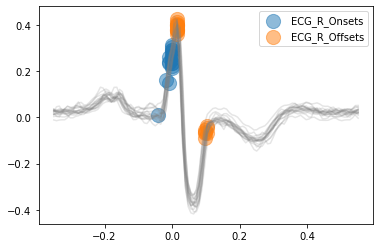

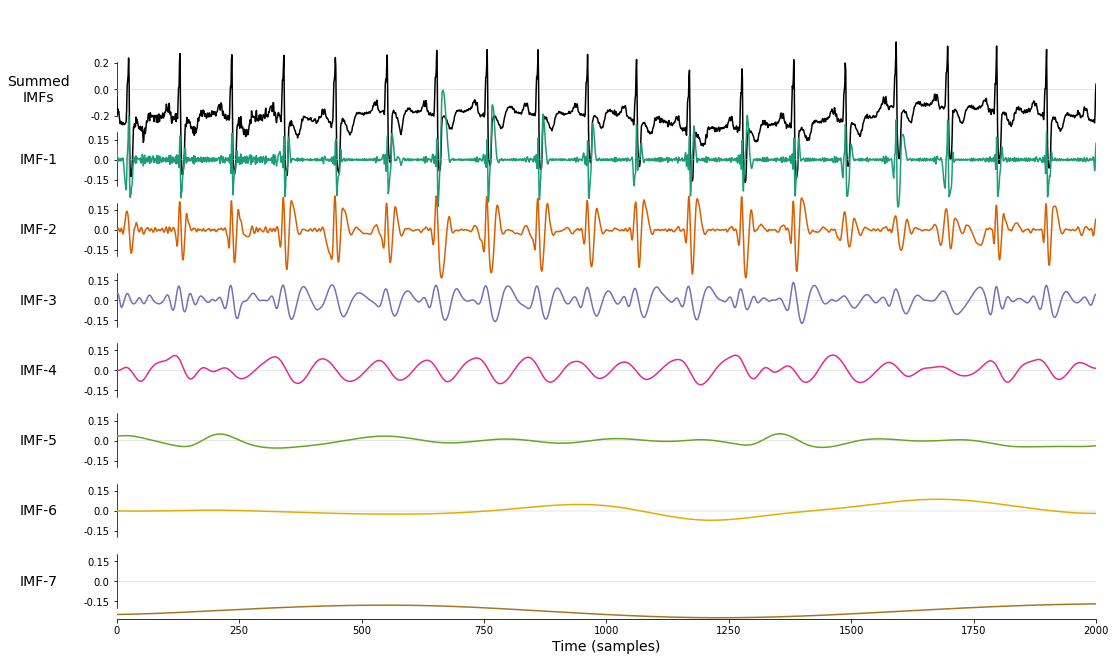

In [5]:
## Visualizing EMD Denoising

import matplotlib.pyplot as plt
import numpy as np
import emd
import neurokit2 as nk

datarec = denoising.denoise_emd(example_signal[mintime:maxtime], sample_rate=125, P=5, beta=300, visualize=True)

print(example_signal[mintime:maxtime].shape)
# plot_signal(example_signal[mintime:maxtime], fs=125)
# plot_signal(datarec[mintime:maxtime], fs=125)
